# Assignment 3 : Clustering





---


1) Installing Levenshtein python library 

In [1]:
!pip install python-Levenshtein

     |████████████████████████████████| 51kB 1.7MB/s 
  Created wheel for python-Levenshtein: filename=python_Levenshtein-0.12.0-cp36-cp36m-linux_x86_64.whl size=144668 sha256=e7d3049336245a4ca10271c1c4362f153c34d8183c739f9afc65d9a952fe3619
  Stored in directory: /root/.cache/pip/wheels/de/c2/93/660fd5f7559049268ad2dc6d81c4e39e9e36518766eaf7e342
Successfully built python-Levenshtein


Importing data into python list

In [2]:
dataFile = open('stemming-assignment.txt', 'r')
data = dataFile.read().split('\n')
print(data)

['a', 'aaron', 'abaissiez', 'abandon', 'abandoned', 'abase', 'abash', 'abate', 'abated', 'abatement', 'abatements', 'abates', 'abbess', 'abbey', 'abbeys', 'abbominable', 'abbot', 'abbots', 'abbreviated', 'abed', 'abel', 'aberga', 'abergavenny', 'abet', 'abetting', 'abhominable', 'abhor', 'abhorr', 'abhorred', 'abhorring', 'abhors', 'abhorson', 'abide', 'abides', 'abilities', 'ability', 'abject', 'abjectly', 'abjects', 'abjur', 'abjure', 'able', 'abler', 'aboard', 'abode', 'aboded', 'abodements', 'aboding', 'abominable', 'abominably', 'abominations', 'abortive', 'abortives', 'abound', 'abounding', 'about', 'above', 'abr', 'abraham', 'abram', 'abreast', 'abridg', 'abridge', 'abridged', 'abridgment', 'abroach', 'abroad', 'abrogate', 'abrook', 'abrupt', 'abruption', 'abruptly', 'absence', 'absent', 'absey', 'absolute', 'absolutely', 'absolv', 'absolver', 'abstains', 'abstemious', 'abstinence', 'abstract', 'absurd', 'absyrtus', 'abundance', 'abundant', 'abundantly', 'abus', 'abuse', 'abused

Defining all the distances.

Here, levenshtein distance has been calculated, but we are using the library we imported earlier to get the distances in the dataset.

In [3]:
import numpy as np

def levenshtein(word1, word2):
  size_x = len(word1) + 1
  size_y = len(word2) + 1
  matrix = np.zeros((size_x, size_y))
  for x in range(size_x):
      matrix[x, 0] = x
  for y in range(size_y):
      matrix[0, y] = y

  for x in range(1, size_x):
      for y in range(1, size_y):
          if word1[x-1] == word2[y-1]:
              matrix [x,y] = min(
                  matrix[x-1, y] + 1,
                  matrix[x-1, y-1],
                  matrix[x, y-1] + 1
              )
          else:
              matrix [x,y] = min(
                  matrix[x-1,y] + 1,
                  matrix[x-1,y-1] + 1,
                  matrix[x,y-1] + 1
              )
  #print (matrix)
  return int(matrix[size_x - 1, size_y - 1])

levenshtein('test', 'text')

1

In [4]:
power2 = []
num = 1
for i in range(0,50):
  power2.append(num)
  num = num*2
print(power2)

[1, 2, 4, 8, 16, 32, 64, 128, 256, 512, 1024, 2048, 4096, 8192, 16384, 32768, 65536, 131072, 262144, 524288, 1048576, 2097152, 4194304, 8388608, 16777216, 33554432, 67108864, 134217728, 268435456, 536870912, 1073741824, 2147483648, 4294967296, 8589934592, 17179869184, 34359738368, 68719476736, 137438953472, 274877906944, 549755813888, 1099511627776, 2199023255552, 4398046511104, 8796093022208, 17592186044416, 35184372088832, 70368744177664, 140737488355328, 281474976710656, 562949953421312]


Defining D1, D2, D3, D4 distances.

Importing Numba, it is cuda library for python used to parallelize computation. 

In [0]:
from numba import jit

In [30]:
@jit(nopython=True, parallel=True)
def d1Dist(word1, word2):
  size_x = len(word1) + 1
  size_y = len(word2) + 1
  matrix = np.zeros((size_x, size_y))
  for x in range(size_x):
      matrix[x, 0] = x
  for y in range(size_y):
      matrix[0, y] = y
  for x in range(1, size_x):
      for y in range(1, size_y):
        
        if word1[x-1] == word2[y-1]:
          matrix [x,y] = min(
                  matrix[x-1, y] + 1,
                  matrix[x-1, y-1],
                  matrix[x, y-1] + 1
              )
        else:
          delta = 1/2**(max(x,y)-1)
          #print(max(x,y)-1)
          matrix [x,y] = min(
                  matrix[x-1,y] + delta,
                  matrix[x-1,y-1] + delta,
                  matrix[x,y-1] + delta
              )
  return (matrix[size_x - 1, size_y - 1])

d1Dist('astronomer', 'astronomically')

0.0076904296875

In [6]:
@jit(nopython=True, parallel=True)
def d2Dist(word1, word2):
  distance = 0
  if len(word1) > len(word2):
    bigger = word1
    smaller = word2
  else:
    bigger = word2
    smaller = word1
  m=len(smaller)
  for i in range(0,len(smaller)):
    if word1[i]!=word2[i]:
      #print(word1[i])
      m=i
      break
    #print(i)
  if m==0:
    return 99999
  for delta in range(m, len(bigger)):
    distance += 1/power2[delta-m]

  return (1/m)*distance
d2Dist('astronomer', 'astronomically')

0.24609375

In [7]:
@jit(nopython=True, parallel=True)
def d3Dist(word1, word2):
  distance = 0
  if len(word1) > len(word2):
    bigger = word1
    smaller = word2
  else:
    bigger = word2
    smaller = word1
  m=len(smaller)
  for i in range(0,len(smaller)):
    if word1[i]!=word2[i]:
      #print(word1[i])
      m=i
      break
    #print(i)
  if m==0:
    return 99999
  for delta in range(m, len(bigger)):
    distance += 1/power2[delta-m]

  return ((len(bigger)-m)/m)*distance
d3Dist('astronomer', 'astronomically')

1.4765625

In [8]:
@jit(nopython=True, parallel=True)
def d4Dist(word1, word2):
  distance = 0
  if len(word1) > len(word2):
    bigger = word1
    smaller = word2
  else:
    bigger = word2
    smaller = word1
  m = len(smaller)
  for i in range(0,len(smaller)):
    if word1[i]!=word2[i]:
      #print(word1[i])
      m = i
      break
    #print(i)
  if m==0:
    return 99999
  for delta in range(m, len(bigger)):
    distance += 1/power2[delta-m]

  return ((len(bigger)-m)/len(bigger))*distance
d4Dist('astronomer', 'astronomically')

0.84375

In [15]:
#import Levenshtein

#levenshtein distance
#levDist = np.array([[Levenshtein.distance(w1,w2) for w1 in data] for w2 in data])

#D1 distance
d1 = np.array([[d1Dist(w1,w2) for w1 in data] for w2 in data])
#D2 distance
#d2 = np.array([[d2Dist(w1,w2) for w1 in data] for w2 in data])
#D3 distance 
#d3 = np.array([[d3Dist(w1,w2) for w1 in data] for w2 in data])
#D4 distance
#d4 = np.array([[d4Dist(w1,w2) for w1 in data] for w2 in data])

print(d1)

[[0.         1.4375     1.74609375 ... 1.96875    2.234375   1.        ]
 [1.4375     0.         0.74609375 ... 1.96875    1.734375   5.        ]
 [1.74609375 0.74609375 0.         ... 1.96484375 1.73828125 9.        ]
 ...
 [1.96875    1.96875    1.96484375 ... 0.         0.984375   6.        ]
 [2.234375   1.734375   1.73828125 ... 0.984375   0.         7.        ]
 [1.         5.         9.         ... 6.         7.         0.        ]]


Calculating clusters for 100 points based on percentage distance threshold. See the distance_threshold parameter for more details.



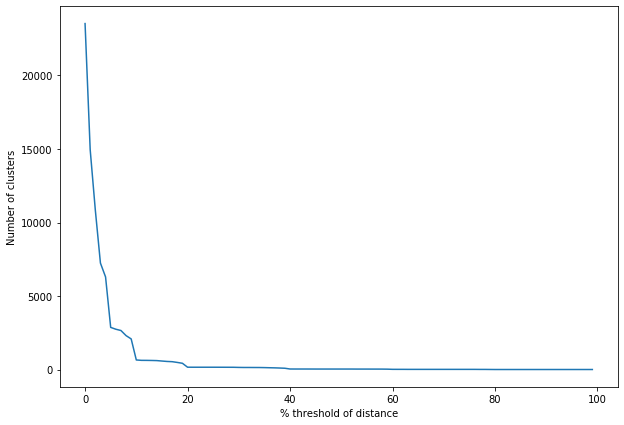

In [16]:
from sklearn.cluster import AgglomerativeClustering
from matplotlib import pyplot as plt

clusters = list()
clusterSize = list()
threshold = list()
for thresh in range(0,100):
  cluster = AgglomerativeClustering(n_clusters = None, affinity='precomputed', distance_threshold = thresh/100*5, linkage = 'complete', compute_full_tree=True).fit(d1)
  clusters.append(cluster)
  clusterSize.append(max(cluster.labels_))
  threshold.append(thresh)
  #print(max(cluster.labels_))

plt.figure(figsize=(10,7))
plt.xlabel('% threshold of distance')
plt.ylabel('Number of clusters')
plt.plot(threshold, clusterSize)
#plt.axhline(y=5, color='r')

In [19]:
print(max(clusters[19].labels_))

426


clusters[ ] is an array of 100 clusters, clusters[2] is cluster with distance_threshold as 2% of distance.

In [53]:
cluster1 = clusters[2]
print("Number of clusters : ", max(cluster1.labels_))
#cluster1list = [max(cluster1.labels_)]
#print(len(cluster1list))
clust = dict()
for index,item in enumerate(cluster1.labels_):
  if str(item) in clust:
    clust[str(item)].append(data[index])
  else:
    clust[str(item)] = [data[index]]
  #cluster1list[item].append(data[item])
print(clust)

Number of clusters :  10853
{'9279': ['a'], '8767': ['aaron'], '6213': ['abaissiez'], '9492': ['abandon', 'abandoned'], '2598': ['abase', 'abash'], '5038': ['abate', 'abated', 'abates'], '5359': ['abatement', 'abatements'], '388': ['abbess', 'abbey', 'abbeys'], '8086': ['abbominable'], '2988': ['abbot', 'abbots'], '6842': ['abbreviated'], '7680': ['abed'], '7679': ['abel'], '3236': ['aberga', 'abergavenny'], '5993': ['abet'], '9481': ['abetting'], '8085': ['abhominable'], '770': ['abhor', 'abhorr', 'abhorred', 'abhorring', 'abhors', 'abhorson'], '4220': ['abide', 'abides'], '4808': ['abilities', 'ability'], '4739': ['abject', 'abjectly', 'abjects'], '2375': ['abjur', 'abjure'], '1106': ['able', 'abler'], '6141': ['aboard'], '5286': ['abode', 'aboded'], '10718': ['abodements'], '9723': ['aboding'], '3043': ['abominable', 'abominably', 'abominations'], '3839': ['abortive', 'abortives'], '2400': ['abound', 'abounding'], '8968': ['about'], '5543': ['above'], '10849': ['abr'], '6797': ['abr

Defining function to indentify root word in cluster.  

In [0]:
# This function return root which has minimum distance with other words in the cluster 
# def findRoot(words):
#   root = []
#   if len(words) > 2:
#     for word1 in words:
#       distance = 0.0
#       for word2 in words:
#         distance += d1Dist(word1, word2)
#         root.append((word1, distance))
#       root.sort()
#       return (root[-1][0])
#   if len(words) == 2:
#     return (min(words))
#   else:
#     return (words[0])

# This function returns root which is smallest in length 
def findRoot(words):
  return min(words)

#findRoot(['hello', 'hell'])
#findRoot(['hello', 'hell', 'helo'])
#findRoot(['hello'])

Creating dictionary in the format:
'word' : root for easier access

In [55]:
rootWordDict = dict()
for key, value in clust.items():
  rootWord = findRoot(value)
  for word in value:
    rootWordDict[word] = rootWord
print(rootWordDict)

{'a': 'a', 'aaron': 'aaron', 'abaissiez': 'abaissiez', 'abandon': 'abandon', 'abandoned': 'abandon', 'abase': 'abase', 'abash': 'abase', 'abate': 'abate', 'abated': 'abate', 'abates': 'abate', 'abatement': 'abatement', 'abatements': 'abatement', 'abbess': 'abbess', 'abbey': 'abbess', 'abbeys': 'abbess', 'abbominable': 'abbominable', 'abbot': 'abbot', 'abbots': 'abbot', 'abbreviated': 'abbreviated', 'abed': 'abed', 'abel': 'abel', 'aberga': 'aberga', 'abergavenny': 'aberga', 'abet': 'abet', 'abetting': 'abetting', 'abhominable': 'abhominable', 'abhor': 'abhor', 'abhorr': 'abhor', 'abhorred': 'abhor', 'abhorring': 'abhor', 'abhors': 'abhor', 'abhorson': 'abhor', 'abide': 'abide', 'abides': 'abide', 'abilities': 'abilities', 'ability': 'abilities', 'abject': 'abject', 'abjectly': 'abject', 'abjects': 'abject', 'abjur': 'abjur', 'abjure': 'abjur', 'able': 'able', 'abler': 'able', 'aboard': 'aboard', 'abode': 'abode', 'aboded': 'abode', 'abodements': 'abodements', 'aboding': 'aboding', 'abo

In [0]:
from nltk.stem import PorterStemmer
from nltk.tokenize import sent_tokenize, word_tokenize

ps = PorterStemmer()

In [56]:
error = 0
for word in data:
  rootData = ps.stem(word)
  if rootData != rootWordDict[word]:
    error+=1
print("Accuracy : ", 100 - error*100/len(data)) 

Accuracy :  45.18103008669046
